<h2>Import Libraries</h2>

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import requests
from os import listdir
from os.path import isfile, join
from datetime import datetime

<h2>Merge CSV files to a single csv file</h2>

In [61]:
#merge 12 month data into one single csv file

#store all file names in files variable
files = listdir('./Sales_Data')

# for file in files:
#     print(file)

#We can use pandas concat to concatenate all the csv files to one

#initialize empty Dataframe
all_months_data = pd.DataFrame()

#lets run a loop and append the csv to all_months_data dataframe

for file in files:
    df=pd.read_csv('./Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data,df])

# lets create a csv for this mergerd data
all_months_data.to_csv('all_months_data.csv',index=False)

In [62]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


<h2>Data Inspection</h2>

In [63]:
# Data Inspection
df=all_months_data.copy()
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [65]:
#lets check for na values

#check for duplicates and remove duplicates
df.drop_duplicates(inplace = True)

df.shape

#remove NA values
df.dropna(inplace=True)

df.shape

df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [66]:
# lets change column names

colnames = df.columns

colnames

newcolnames = ['OrderID','Product','Quantity_Ordered','Price_Each','Order_Date','Purchase_Address'] 

df.columns = newcolnames

#Check if columns were Changed?
df.columns

Index(['OrderID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185687 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   OrderID           185687 non-null  object
 1   Product           185687 non-null  object
 2   Quantity_Ordered  185687 non-null  object
 3   Price_Each        185687 non-null  object
 4   Order_Date        185687 non-null  object
 5   Purchase_Address  185687 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [68]:
df = df.drop(df[df['Quantity_Ordered'] == 'Quantity Ordered'].index)


<h1>Data Type Conversion</h1>

In [69]:
#lest convert the data types now
df['Quantity_Ordered']=pd.to_numeric(df['Quantity_Ordered'])

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185675 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   OrderID           185675 non-null  object
 1   Product           185675 non-null  object
 2   Quantity_Ordered  185675 non-null  int64 
 3   Price_Each        185675 non-null  object
 4   Order_Date        185675 non-null  object
 5   Purchase_Address  185675 non-null  object
dtypes: int64(1), object(5)
memory usage: 9.9+ MB


In [71]:
df['Price_Each']=df['Price_Each'].astype(float)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185675 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   OrderID           185675 non-null  object 
 1   Product           185675 non-null  object 
 2   Quantity_Ordered  185675 non-null  int64  
 3   Price_Each        185675 non-null  float64
 4   Order_Date        185675 non-null  object 
 5   Purchase_Address  185675 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.9+ MB


<h2>Add new Total Column</h2>

In [73]:
df['Total']=df['Quantity_Ordered']*df['Price_Each']

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185675 entries, 0 to 11685
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   OrderID           185675 non-null  object 
 1   Product           185675 non-null  object 
 2   Quantity_Ordered  185675 non-null  int64  
 3   Price_Each        185675 non-null  float64
 4   Order_Date        185675 non-null  object 
 5   Purchase_Address  185675 non-null  object 
 6   Total             185675 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 11.3+ MB


In [75]:
df['Month']=df['Order_Date'].str[0:2]

<h2>Add new Month Column</h2>

In [76]:
df['Month']=df['Month'].astype(int)

In [77]:
df.head(2)

,OrderID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Total,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4


<h3>Q1. What is the best month for sales? How much was earned that month?</h3>

In [78]:
df.head(2)

,OrderID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Total,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4


In [79]:
total_by_month = df.groupby('Month')['Total'].sum()

In [80]:
total_by_month.sort_values(ascending = False)

Month
12    4608280.75
10    3734177.86
4     3389217.98
11    3197863.10
5     3150506.24
3     2804969.51
7     2646311.32
6     2576268.16
8     2241071.38
2     2200075.09
9     2094453.74
1     1821313.17
Name: Total, dtype: float64

December was the best month for sales as total revenue in Dec was 4608280.75

<h4>Plotting for this data</h4>

In [81]:
months = range(1,13)

Text(0.5, 1.0, 'Total Sales per Month')

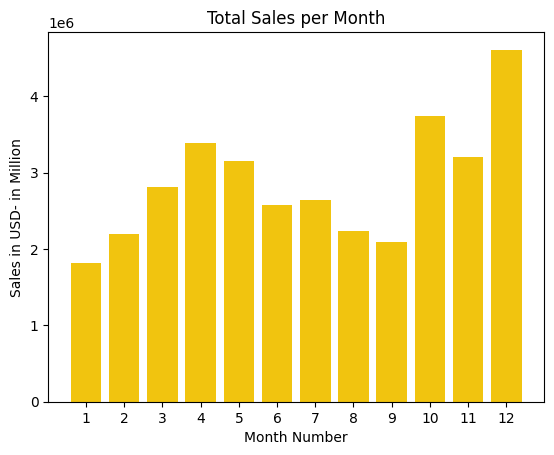

In [82]:
plt.bar(months,total_by_month,color='#f1c40f')
plt.xticks(months)
plt.ylabel('Sales in USD- in Million')
plt.xlabel('Month Number')
plt.title('Total Sales per Month')

<h3>Q1. What City had highest sales?</h3>

In [83]:
df.head(2)

,OrderID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Total,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4


<p>We need to extract city from the data</p>

In [84]:
df['City'] = df['Purchase_Address'].apply(lambda x: x.split(',')[1])

In [85]:
df.head(2)

,OrderID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Total,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston


In [86]:
total_city = df.groupby('City')['Total'].sum()

In [87]:
total_city

City
 Atlanta          2794195.23
 Austin           1818029.38
 Boston           3657927.66
 Dallas           2765373.96
 Los Angeles      5448280.34
 New York City    4661714.15
 Portland         2319331.94
 San Francisco    8254609.62
 Seattle          2745046.02
Name: Total, dtype: float64

In [88]:
cities = total_city.index

Text(0.5, 1.0, 'Sales per City')

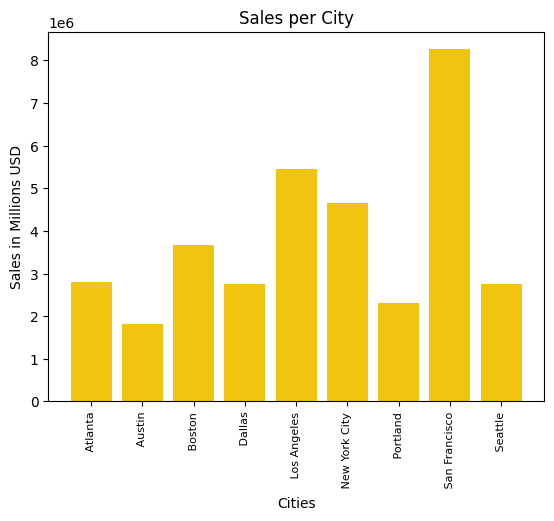

In [89]:
plt.bar(cities,total_city, color='#f1c40f')
plt.xticks(cities,rotation = 'vertical', size=8)
plt.xlabel('Cities')
plt.ylabel('Sales in Millions USD')
plt.title('Sales per City')

San Francisco is the best performing city accounting for sales 8254609.62 USD

<h3>Q1. What time should we display advertisements to maximise the likelohood of customer's buying the products?</h3>

In [90]:
df.head(2)

,OrderID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Total,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston


In [91]:
#lets change the timestamp Order Date column to datetime datatype

In [92]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

C:\Users\sunde\AppData\Local\Temp\ipykernel_2940\2524311366.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order_Date'] = pd.to_datetime(df['Order_Date'])


In [93]:
df['Hour']=df['Order_Date'].dt.hour

In [94]:
df.head()

,OrderID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Total,Month,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles,9


In [95]:
total_date = df[['Hour','Total','Quantity_Ordered']]

In [96]:
total_date

,Hour,Total,Quantity_Ordered
0,8,23.90,2
2,22,99.99,1
3,14,600.00,1
4,14,11.99,1
5,9,11.99,1
...,...,...,...
11681,20,8.97,3
11682,16,700.00,1
11683,7,700.00,1
11684,17,379.99,1


In [97]:
qtty_hour = total_date.groupby('Hour')['Quantity_Ordered'].sum()

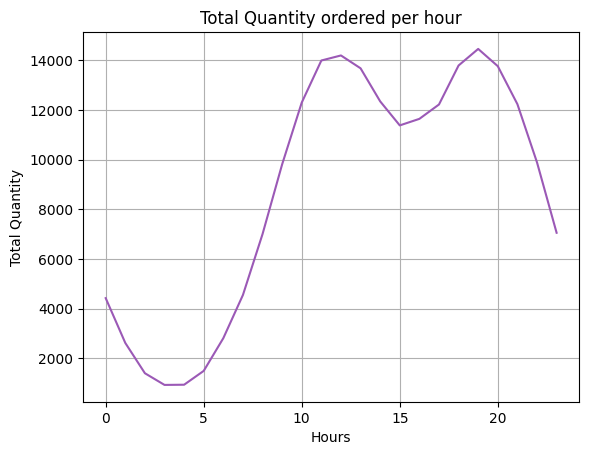

In [98]:
plt.plot(qtty_hour.index,qtty_hour,color='#9b59b6')
plt.xlabel('Hours')
plt.ylabel('Total Quantity')
plt.title('Total Quantity ordered per hour')
plt.grid()


In [99]:
total_hour = total_date.groupby('Hour')['Total'].sum()

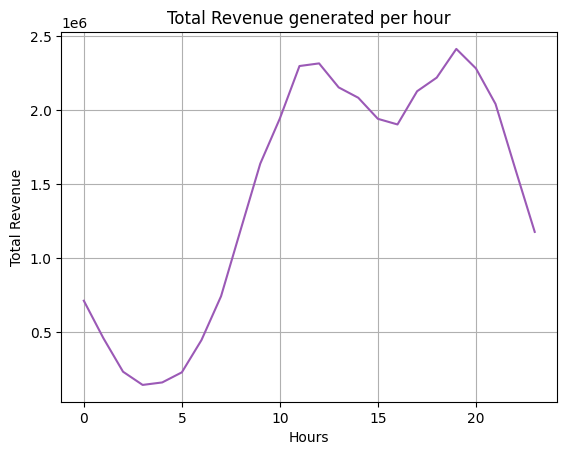

In [100]:
plt.plot(total_hour.index,total_hour,color='#9b59b6')
plt.xlabel('Hours')
plt.ylabel('Total Revenue')
plt.title('Total Revenue generated per hour')
plt.grid()

I would reccommend that advertising should be on steroids in the time from
11 am or 7pm based on the graphs

<h3>Q1. What products are pftern sold together?</h3>

In [101]:
df.head(3)

,OrderID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Total,Month,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles,14


In [102]:
Product_df = df.groupby(['Product','Price_Each'])['Quantity_Ordered'].sum().sort_values(ascending=False)

In [103]:
Product_df= pd.DataFrame(Product_df)

In [104]:
Product_df.reset_index(inplace=True)

In [105]:
Product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product           19 non-null     object 
 1   Price_Each        19 non-null     float64
 2   Quantity_Ordered  19 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 588.0+ bytes


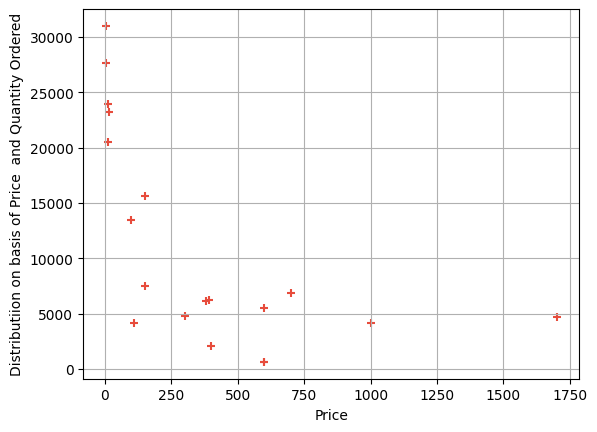

In [106]:
plt.scatter(Product_df['Price_Each'],Product_df['Quantity_Ordered'],marker='+',color='#e74c3c')
plt.xlabel('Price')
plt.ylabel('Quantity Ordered')
plt.ylabel('Distributiion on basis of Price  and Quantity Ordered')
plt.grid()

In [107]:
Product_df

,Product,Price_Each,Quantity_Ordered
0,AAA Batteries (4-pack),2.99,30985
1,AA Batteries (4-pack),3.84,27614
2,USB-C Charging Cable,11.95,23929
3,Lightning Charging Cable,14.95,23168
4,Wired Headphones,11.99,20522
5,Apple Airpods Headphones,150.00,15636
6,Bose SoundSport Headphones,99.99,13429
7,27in FHD Monitor,149.99,7541
8,iPhone,700.00,6847
9,27in 4K Gaming Monitor,389.99,6239


In [108]:
extrap = df[df['OrderID'].duplicated(keep=False)]

In [109]:
extrap.head(2)

,OrderID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Total,Month,City,Hour
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles,14


In [110]:
extrap['Grouped'] = extrap.groupby('OrderID')['Product'].transform(lambda x:','.join(x))

C:\Users\sunde\AppData\Local\Temp\ipykernel_2940\3170414266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extrap['Grouped'] = extrap.groupby('OrderID')['Product'].transform(lambda x:','.join(x))


In [111]:
extrap.head()

,OrderID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Total,Month,City,Hour,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",600.00,4,Los Angeles,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",11.95,4,Los Angeles,19,"Google Phone,USB-C Charging Cable"
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",5.98,4,San Francisco,17,"AAA Batteries (4-pack),Google Phone"


In [112]:
extrap['Grouped'].value_counts()

Grouped
iPhone,Lightning Charging Cable             1772
Google Phone,USB-C Charging Cable           1714
iPhone,Wired Headphones                      722
Vareebadd Phone,USB-C Charging Cable         624
Google Phone,Wired Headphones                606
                                            ... 
20in Monitor,LG Washing Machine                2
LG Dryer,Google Phone                          2
Vareebadd Phone,27in FHD Monitor               2
iPhone,Google Phone                            2
LG Washing Machine,AA Batteries (4-pack)       2
Name: count, Length: 350, dtype: int64

In [113]:
extrap[['OrderID','Grouped']].drop_duplicates(inplace = True)

C:\Users\sunde\AppData\Local\Temp\ipykernel_2940\161968424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extrap[['OrderID','Grouped']].drop_duplicates(inplace = True)


In [114]:
common = pd.DataFrame(extrap['Grouped'].value_counts())

In [115]:
common.reset_index(inplace=True)

In [116]:
common = common.head(10)
common

,Grouped,count
0,"iPhone,Lightning Charging Cable",1772
1,"Google Phone,USB-C Charging Cable",1714
2,"iPhone,Wired Headphones",722
3,"Vareebadd Phone,USB-C Charging Cable",624
4,"Google Phone,Wired Headphones",606
5,"iPhone,Apple Airpods Headphones",572
6,"Google Phone,Bose SoundSport Headphones",322
7,"Google Phone,USB-C Charging Cable,Wired Headph...",237
8,"Vareebadd Phone,Wired Headphones",208
9,"iPhone,Lightning Charging Cable,Wired Headphones",168


([<matplotlib.axis.XTick at 0x23b0409df50>,
 [Text(0.0, 0, 'iPhone,Lightning Charging Cable'),
  Text(1.0, 0, 'Google Phone,USB-C Charging Cable'),
  Text(2.0, 0, 'iPhone,Wired Headphones'),
  Text(3.0, 0, 'Vareebadd Phone,USB-C Charging Cable'),
  Text(4.0, 0, 'Google Phone,Wired Headphones'),
  Text(5.0, 0, 'iPhone,Apple Airpods Headphones'),
  Text(6.0, 0, 'Google Phone,Bose SoundSport Headphones'),
  Text(7.0, 0, 'Google Phone,USB-C Charging Cable,Wired Headphones'),
  Text(8.0, 0, 'Vareebadd Phone,Wired Headphones'),
  Text(9.0, 0, 'iPhone,Lightning Charging Cable,Wired Headphones')])

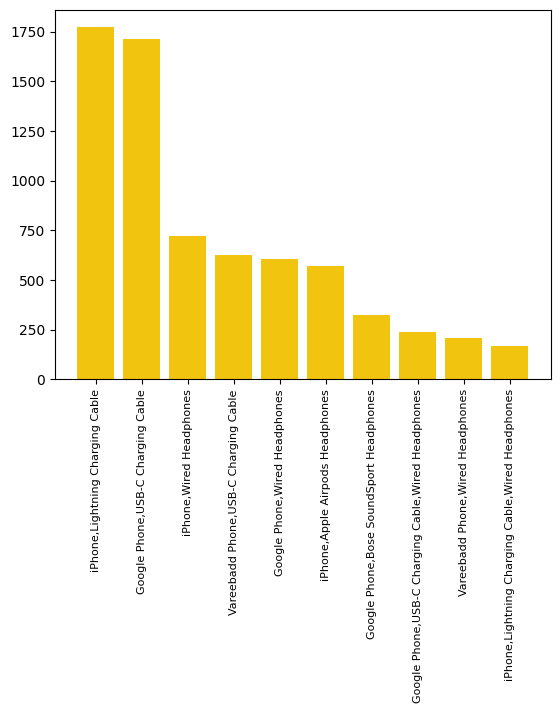

In [117]:
plt.bar(common['Grouped'],common['count'],color='#f1c40f')
plt.xticks(common['Grouped'],rotation='vertical',size = 8)

Most of the times when purchasaes were made, cables were sold the most together with phones as well as headphones, also these items are not that expensive as compared to Driers,laptops and washing machines.